# データの表現と特徴量エンジニアリング

特徴量の種類

- 連続地特徴量(continuous feature)

    ピクセルの明るさ、花の大きさ、etc... **定量的なもの**

- カテゴリ特徴量(categorical feature)

    離散値特徴量(discrete feature)とも

    性別、職業、製品カテゴリ、etc... **定性的なもの**

カテゴリ特徴量を表現する方法として、ワンホットエンコーディング(one-hot-encoding)がある→P.207



In [1]:
# カテゴリ変数(特徴量)をpandasを使ってワンホットエンコーディングに変換
import pandas as pd
import os
import mglearn

# このファイルにはコラム名を含んだヘッダがないため、header=Noneを指定し、
# コラム名を"names"で明示的に指定
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status',
           'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income'])
# 解説のために、いくつかのカラムだけを選択
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
# IPython.displayを使うとJupyter notebookで綺麗な出力が得られる
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [2]:
# 文字列で表されているカテゴリデータには、表記間違いや大文字小文字、書き方の違い(ex: man or male)がある→場合によっては前処理が必要
# 各行に含まれるユニークな値とその頻度を表示してみる
print(data.gender.value_counts())
# genderにはMaleとFemaleしか含まれていないからOK

Male      21790
 Female    10771
Name: gender, dtype: int64


In [3]:
# get_dummies関数をつかって簡単にデータをワンホッとエンコーディングできる
# →自動的に文字列などのObject型やカテゴリ型の行を全て変換する
print("Original features:\n", list(data.columns), "\nfeatures: ", len(list(data.columns)), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns), "\nfeatures: ", len(list(data_dummies.columns)))
# 連続ち特徴量のageとhours-per-weekは変更されず、カテゴリ特徴量はとりうる値ごとに一つの特徴量を持つように拡張されている

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 
features:  7 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation

In [4]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [5]:
# values属性を用いるとdata_dummies DataFrameをNumpy配列に変換し、それを使って機械学習モデルを学習させることができる
# …の前に、出力である2つのincome列のターゲット変数を分離させる
# age ... occupation_ Transport-movingまでを抜きだす
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Numpy配列を取り出す
X = features.values
y = data_dummies['income_ >50K'].values
print(f"X.shape: {X.shape}  y.shape: {y.shape}")
# scikit-learnが扱える形になった

X.shape: (32561, 44)  y.shape: (32561,)


In [6]:
# ロジスティック回帰で学習
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(f"Test score: {logreg.score(X_test, y_test):.2f}")
# 注意→P.211

Test score: 0.81


In [7]:
# pandasのget_dummiesは全ての数値を連続地として扱ってしまう→scikit-learnのOneHotEncoderを用いるか、DataFrameの列を数値から文字列に変換する
# 整数特徴量とカテゴリ文字列特徴量からなるDataFrameを作成
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [8]:
# get_dummiesを実行しても、整数特徴量は変化しない
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [9]:
# Integer Featureに対してもダミー変数を作りたければ、columnsパラメータで明示的に指定する。
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


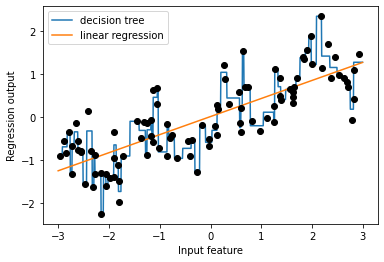

In [11]:
# データ表現方法は利用する機械学習モデルにも依存する
# wave回帰データセットで線形回帰モデルと決定木回帰を比較
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt


X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend(loc="best")

In [12]:
# 線形モデルを連続データに対してより強力にする方法として、特徴量のビニング(binning)、離散化(descretization)がある
# 詳しくはP.214
# linspaceで-3~3を10に区切る→linspaceで11のエントリを作り、便は2つの連続する境界の間に10のビンを作る。度数分布表を作る感じ？
bins = np.linspace(-3, 3, 11)
print(f"bins: {bins}")

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [13]:
# 個々のデータポイントがどのビンに入るかを記録。digitizeで簡単にできる
which_bin = np.digitize(X, bins=bins)
print("\nData points: \n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])
# waveデータセットの連続値入力特徴量の、どのビンにデータポイントが入っているかを表現したカテゴリ特徴量への置き換えをした
# このデータにscikit-learnモデルを適用するには、この離散値特徴量をワンホットエンコーディングに変換する必要がある
# OneHotEncoderはget_dummiesと同じ機能を持つが、整数値で表されたカテゴリ変数しか扱えない


Data points: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [14]:
from sklearn.preprocessing import OneHotEncoder
# ワンホットエンコーディングへ変換
encoder = OneHotEncoder(sparse=False)
# .fitでwhici_binに現れる整数値のバリエーションを確認
encoder.fit(which_bin)
# transformでワンホットエンコーディングを行う
X_binned = encoder.transform(which_bin)
print(X_binned[:5])
# つまり、元データ-0.75は-1.2~-0.6(4番目の度数)の中にあるみたいな感じに変換してる

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
# 10のbinを指定したから、X_binnedには10個の特徴量ができている
print(f"X_binned.shape: {X_binned.shape}")

X_binned.shape: (100, 10)


Text(0.5, 0, 'Input feature')

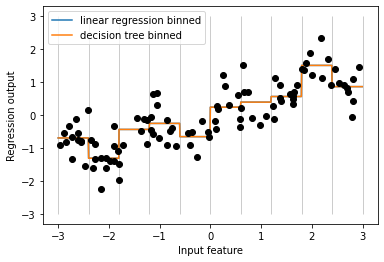

In [16]:
# ワンホットエンコーディングデータに対してもう一度モデルを作ってみる
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
# どちらも同じ予測を行っている
# 決定木に関しては柔軟性が低下している(メリットなし)が、線形モデルに関しては柔軟に表現できるようになった
# 線形モデルを使いたい場合、例えばデータが高次元で、いくつかの特徴量が出力と非線形な関係を持つときはビニングを使うと良い→P.217

特徴量表現をより豊にするもう一つの方法として、特に線形モデルに有効なものが、

## 交互作用特徴量(interaction feature)

## 多項式特徴量(polynomial feature)

を加える方法。統計モデルでよく用いられるが、機械学習にも一般的に使われる

↑のグラフでは、線形モデルは、waveデータセットの個々のビンに対して定数を学習する。

でも、オフセット(定数)だけでなく傾きも学習できるはず。ビニングされたデータに対する線形モデルに傾きを加える一つの方法はものと特徴量(グラフのX軸)を加え直すこと

→線形モデルの数式を思い出して！

In [17]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
# 元のXの特徴量が加わって11次元のデータセットになる

(100, 11)


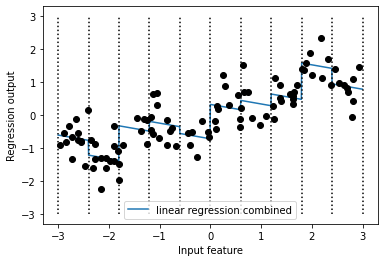

In [18]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

# 縦線の描画
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc='best')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

この例では、モデルは個々のビンに対してオフセットと傾きを学習している。傾きは全部下向きで、全てのビンで同じ傾き。

→x軸は一つだけだから、傾きも一つになっている。これはあまり役に立たない。。。

それぞれのビンことに傾きがあると良い。

これを実現するには、データポイントがどのビンに入っているのかを示す特徴量(X_binned)と、
x軸のどこにあるのか(X)を示す特徴量の交互作用もしくは積を、特徴量としてさらに加えれば良い
この特徴量はビンの指示子と特徴量の積となる。

```

X= [[-0.75275929]
    [ 2.70428584]
    [ 1.39196365]
    [ 0.59195091]
    [-2.06388816]]

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]     * X
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

= [[0. 0. 0. -0.75 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 2.70]
   [0. 0. 0. 0. 0. 0. 0. 1.39 0. 0.]
   [0. 0. 0. 0. 0. 0.59 0. 0. 0. 0.]
   [0. -2.06 0. 0. 0. 0. 0. 0. 0. 0.]]
```

In [19]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)
# これでデータセットの特徴量は20となった。(どのビンにデータポイントがあるかを示すビン番号特徴量・元の特徴量とビン番号の積)

(100, 20)


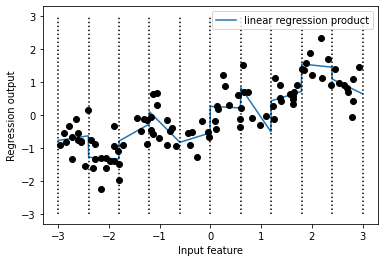

In [20]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label="linear regression product")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc='best')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')
# 個々のビンがそれぞれオフセットと傾きを持つようになった！

ビニングは連続値特徴量を拡張する方法の一つ。

もう一つの方法は、元の特徴量の多項式(polynomial)を使うこと。ある特徴量xに対して、 x\*\*2, x\*\*3, x\*\*4を考えること。

preprocessingモジュールのPolynomialFeaturesに実装されている。

In [22]:
from sklearn.preprocessing import PolynomialFeatures

#  x ** 10 までの多項式を加える
# デフォルトのinclude_bias=Trueだと、常に1となる特徴量を加える
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [23]:
print(f"X_poly.shape: {X_poly.shape}")
# 10の特徴量ができる

X_poly.shape: (100, 10)


In [24]:
#  X_polyの内容をXと比較
print(f"Entries of X:\n{X[:5]}")
print(f"Entries of X_poly:\n{X_poly[:5]}")

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [26]:
# 個々の特徴量の意味はget_feature_names メソッドで知ることができる
print(f"Polynomial feature names:\n{poly.get_feature_names()}")

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


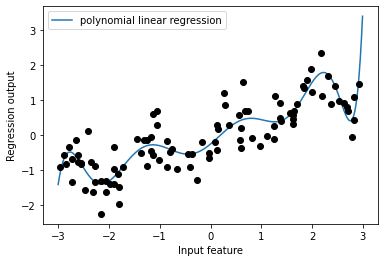

In [28]:
# 多項式特徴量を線形回帰モデルと組み合わせると、多項式回帰となる
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend(loc='best')
# 境界近辺やデータが少ない領域で極端な振る舞いを示してしまう

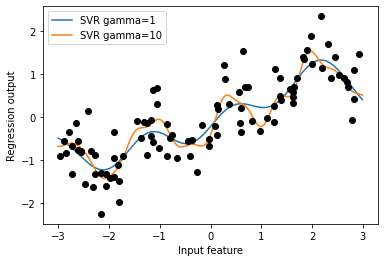

In [29]:
# SVMモデルを変換していないオリジナルデータに適用してみる
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label=f'SVR gamma={gamma}')
plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend(loc='best')
# このように複雑なモデルを使うと、明示的な変換をしなくても良いモデルができる

In [30]:
# boston_housingに適用
# まずMinMaxScalerで0~1の間になるようスケール変換
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# 2次の多項式特徴量と交互作用を抽出
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_poly.shape: {X_train_poly.shape}")
# 特徴量が105までに増えた→元の特徴量から2つの特徴量全ての組み合わせと、元の特徴量の2乗(元の特徴量の2つの積(degree)までを考慮)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [32]:
# 入力特徴量と出力特徴量の関係
print(f"Polynomial feature names:\n{poly.get_feature_names()}")
# 定数特徴量・元の最初の特徴量・最初の特徴量^2・最初の特徴量 * その他の特徴量の組み合わせ

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [34]:
# Ridge回帰を使って、交互作用特徴量を入れた場合と入れない場合を比較
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print(f"Score without interactions: {ridge.score(X_test_scaled, y_test):.3f}")
ridge = Ridge().fit(X_train_poly, y_train)
print(f"Score with interactions: {ridge.score(X_test_poly, y_test):.3f}")

Score without interactions: 0.621
Score with interactions: 0.753


In [35]:
# ランダムフォレストのような複雑なモデルを使う場合は、話が変わってくる
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print(f"Score without interactions: {rf.score(X_test_scaled, y_test):.3f}")
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print(f"Score with interactions: {rf.score(X_test_poly, y_test):.3f}")
# 追加の特徴量がなくてもスコアは上だが、追加しているとスコアが下がっている

Score without interactions: 0.788
Score with interactions: 0.769


特徴量を2乗3乗したものが線形回帰モデルでは有用

他に特定の特徴量に有用である変換が、log exp sinなどの数学関数を用いたもの。線形モデルやニューラルネットワークモデルは、個々の特徴量のスケールや分散と密接に結びついている。

特徴量とターゲットに非線形関係があると、モデリングが難しくなる。log、expなどの関数が、データの相対的なスケールを修正するので、線形モデルやニューラルネットワークモデルでモデリングしやすくなる。ほとんどのモデルは、特徴量・出力がガウス分布に従った場合に最もうまく機能する。

logやexpでの変換が特に有効なケースは、整数のカウントデータを扱う場合。→例: ユーザAは何回ログインしたか

多くの場合、カウントデータは負ではなく、特定の統計的パターンに従う

In [37]:
# 実際に出てくるデータ特性に似た合成データで試してみる。入力: 整数、出力: 連続値
rnd = np.random.RandomState(0)
# 正規分布の作成
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

# ポアソン分布の作成
X = rnd.poisson(10 * np.exp(X_org))
# 内積計算
y = np.dot(X_org, w)

In [38]:
# 第一特徴量の個々の値が出現する回数
print(f"Number of feature appearances:\n{np.bincount(X[:, 0])}")
# 値2が一番多く出ている(68回)、84 85も2回ずつ出ている

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

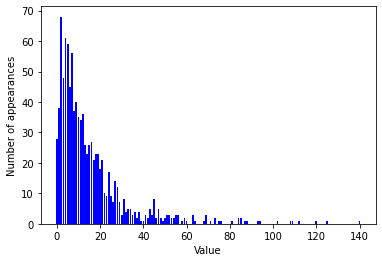

In [44]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
# ポアソン分布の形になっている。X[:, 1]も同じ特性になっている

In [45]:
# ポアソン分布のようなデータは多くの線形モデルではうまく扱えない
# Ridge回帰でモデルを作ってみる
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print(f"Test Score: {score:.3f}")
# R^2スコアが比較的小さい

Test Score: 0.622


In [46]:
# 対数変換を行うことで変わってくる。データに0があるため、+1してXを変換させる
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

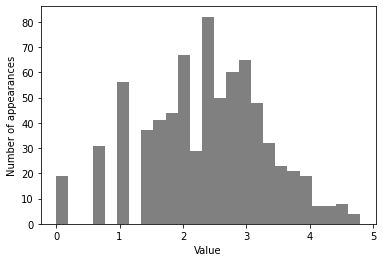

In [48]:
# 変換後は非対称性が少なく、非常に大きい外れ値はない
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [49]:
# 新しいデータに対してRidgeモデルを作ってみる
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print(f"Test Score: {score:.3f}")

Test Score: 0.875


データセットと機械学習モデルの組み合わせに対して最適な変換を見つけるのはある種の技芸

多くの場合は特徴量ごとに別の変換をすることになる。決定木ベースのモデルには関係ないが、線形モデルにとっては大事な処理。
回帰モデルの場合は、ターゲット変数yも変換したほうが良い場合もある。カウントデータなどの予測は一般的なタスクだが、log(y + 1)で変換するとうまくいくことが多い。

ビニング・多項式・交互作用はあるデータセットに対するモデルの性能に大きい影響を与える。線形モデルやナイーブベイズなどの単純なモデルで特に重要。
決定木ベースのモデルは自分で重要な交互作用を見つけることができるので、多くの場合で明示的に変換する必要はない。SVM・最近傍法・ニューラルネットワークは、ビニング・多項式・交互作用の恩恵を受けることがあるが、線形モデルの場合ほど大きくはない。

# 自動特徴量選択

特徴量を追加すると、モデルは複雑になり、過剰適合の要因になる。また、高次元データセット一般の場合、最も有用な特徴量だけを残すことでモデルが単純になり、汎化性能が高くなる。

## 特徴量選択3つの戦略

- 単変量統計: univariate statistics

- モデルベース選択: model-based selection

- 反復選択: iterarive selection

これらの方法は全て教師あり手法だから、モデルを適合するためのターゲットが必要。特徴量選択は訓練セットだけを用いて行う必要がある。

## 単変量統計
P.229

単変量特徴選択をscikit-learnで使うとき、テストを選択する

- クラス分類 → f_classif(デフォルト)

- 回帰 → f_regression

さらに、テストで求められるp-値を元に、特徴量を捨てる方法も指定する
p-値が大きい(ターゲットと関係がなさそう)特徴量を捨てる際の閾値を指定。

`SelectKBest`では選択する特徴量の数を指定する。`SelectPrecentile`では残す特徴量の割合を選択する。

In [50]:
# cancerデータセットに特徴量抽出を適用してみる。タスクを難しくするために、情報量のないノイズを加える
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# シードを指定して乱数を決定
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# ノイズ特徴量をデータに加える
# 最初の30特徴量は元のデータセットのもので、後の50はノイズ
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(default)とSelectPercentileを使って50%の特徴量を選択
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 訓練セットを変換
X_train_selected = select.transform(X_train)

print(f"X_train.shape: {X_train.shape}")
print(f"X_train_selected.shape: {X_train_selected.shape}")

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], <a list of 0 Text major ticklabel objects>)

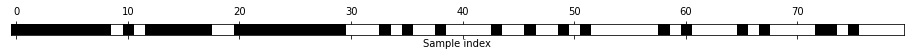

In [53]:
# どの特徴量が使われているかをget_supportメソッドで調べることができる。
# 選択された特徴量を示す真偽値のマスクを返す
mask = select.get_support()
print(mask)
# マスクの可視化(黒がTrue, 白がFalse)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
# 元の特徴量のほとんどが選択されているが、元の特徴量への復元は完全ではない。

In [56]:
# ロジスティック回帰を用いて全ての特徴量を使った場合と選択された特徴量だけを使った場合で比較
from sklearn.linear_model import LogisticRegression

# テストデータの変換
X_test_selected = select.transform(X_test)

# バージョン0.22からLogisticRegressionのsolverの引数がliblinearからlbfgsに変更
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, y_train)
print(f"Score with all features: {lr.score(X_test, y_test):.3f}")
lr.fit(X_train_selected, y_train)
print(f"Score with only selected features: {lr.score(X_test_selected, y_test):.3f}")
# 必ずしも性能が上がるとは限らないが、特徴量が多すぎる場合や、多くの特徴量が関係ないと思われる場合には、単変量特徴量選択は有用

Score with all features: 0.930
Score with only selected features: 0.940


## モデルベース特徴量選択

P.232

教師あり学習モデルを用いて個々の特徴量の重要性を判断し、重要なものだけを残す手法。選択時に使うモデルは、最終的に使う学習モデルと同じでなくても良い。
決定木べーすには特徴量の重要性そのものをエンコードした`feature_importances_`属性がある。線形モデルには係数があり、絶対値をとると特徴量の重要性を捉えた値として利用できる。

L1ペナルティを用いた線形モデルは、疎な係数を学習し、特徴量の一部しか利用できないようになる。これは、モデルによる特徴量選択とも考えられるが、これを前処理過程として、別のモデルで使う特徴量選択を行うこともできる。

モデルベースの選択は、全ての特徴量を同時に考慮するため、変数間の交互作用を捉えることができる。

`SelectFromModel`変換器を使う

In [57]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

SelectFromModelは教師ありモデルで得られた特徴量の重要性が、指定した閾値よりも大きい特徴量だけを選択する。
単変数特徴量選択での結果と比較するため、中央値を閾値として半分の特徴量が選ばれるようにする。
ランダムフォレストは非常に複雑なモデルのため、単変量を用いるよりも遥かに強力な手法となる。

In [59]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_l1.shape: {X_train_l1.shape}")

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], <a list of 0 Text major ticklabel objects>)

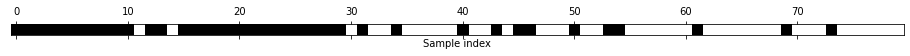

In [61]:
mask = select.get_support()

# マスクの可視化
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [64]:
# 性能
X_test_l1 = select.transform(X_test)
score = LogisticRegression(solver="liblinear").fit(X_train_l1, y_train).score(X_test_l1, y_test)
print(f"Test score: {score:.3f}")

Test score: 0.951


# 反復特徴量選択
異なる特徴量を用いた一連のモデルを作っていく

特徴量を全く使わないところから、ある基準が満たされるまで1つずつ特徴量を加える方法と、
全ての特徴量を使う状態から１つずつ特徴量を取り除いていく方法がある。多数のモデルを作るため、計算量的に遥かに高価な手法。

この方法の一つが、**再帰的特徴量削減(RFE: recursive feature elimination)**。全ての特徴量から開始してモデルを作り、そのモデルで最も重要度が低い特徴量を削除した後にまたモデルを作り、最も重要度の低い特徴量を削除する。この過程を事前に定めた数の特徴量になるまで繰り返す。モデルベース選択と同様に、選択に用いるモデルが特徴量の重要性を決定する方法を提供しなければならない。

([], <a list of 0 Text major ticklabel objects>)

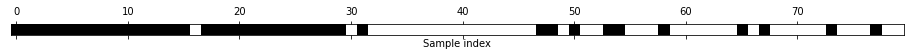

In [65]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [67]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression(solver='liblinear').fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print(f"Test score: {score:.3f}")

Test score: 0.951


In [68]:
# RFEの内部で用いられたモデルを用いて予測を行うこともできる(選択された特徴量だけを用いる)
print(f"Test score: {select.score(X_test, y_test):.3f}")
# RFE内部のランダムフォレストは、選択された特徴量で訓練したロジスティック回帰と同じ性能
# →適切な特徴量を選んだことで、線形モデルの性能がランダムフォレストと同じになった

Test score: 0.951


どの特徴量を入力としたら良いかわからない場合には、自動特徴量選択は有用。
また、予測を高速化したい場合や、解釈しやすいモデルを構築したい場合などに、必要な特徴量を減らすのにも役に立つ。

性能には大きく寄与することはないが、ツールとしては重要な役割を持っている。

# 専門家知識の応用
P.235
レンタルバイクの件数から特定の日に自転車を利用できるかを予測する

In [69]:
# データをpandasのDataFrameとしてロード
citibike = mglearn.datasets.load_citibike()

In [70]:
print(f"Citi Bike data:\n{citibike.head()}")

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

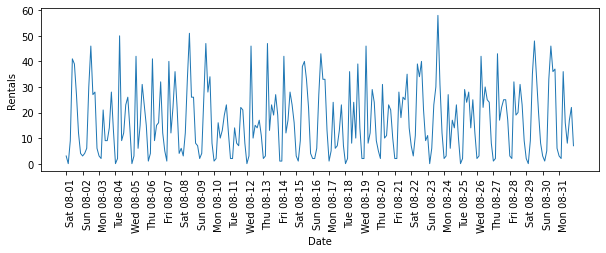

In [72]:
# レンタル頻度の可視化
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

このような時系列に対する予測タスクでは、過去から学習(learn from the past)と未来を予測する(predict for the future)アプローチをとる。
訓練セットとテストセットを分割する前に、ある特定の日までの全てのデータを訓練セットとし、それ以降をテストセットとする。

ここでは、最初の23日分に相当する184データポイントを訓練セットとし、残りの8日分に相当する64データポイントをテストセットとした。
この予測タスクにおいて利用する特徴量は、レンタルが発生した際の日時だけ。出力はその後の3時間のレンタル数となる。
日時を計算機で扱う時にはPOSIX時刻(UNIX時刻とも。1970年1月1日0時からの秒数)をよく用いる。

In [73]:
# ターゲット値(レンタル数)を抽出
y = citibike.values
# 10 ** 9で割ってPOSIX時刻に変換
X = citibike.index.astype("int64").to_numpy().reshape(-1, 1) // 10 ** 9 #切り捨て除算

In [76]:
# 訓練セットとテストセットに分割する関数を定義
# 最初の184データポイントを訓練に、残りをテストに使う
n_train = 184

# 与えられた特徴量セットで、回帰器を評価しプロットする関数
def eval_on_features(features, target, regressor):
    # 特徴量を訓練セットとテストセットに分割
    X_train, X_test = features[:n_train], features[n_train:]
    # ターゲットの配列も分割
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print(f"Test-set R^2: {regressor.score(X_test, y_test):.2f}")
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    # ~184
    plt.plot(range(n_train), y_train, label="train")
    # 184~184+testの長さ
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


<Figure size 432x288 with 0 Axes>

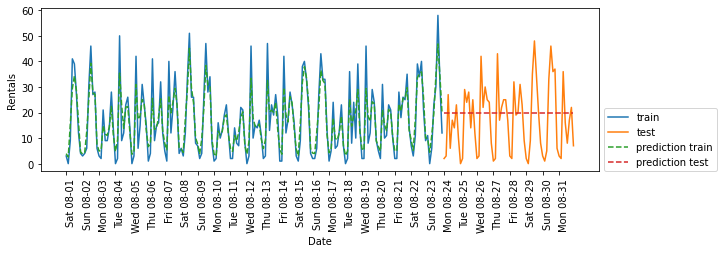

In [79]:
# 前処理の必要のないランダムフォレストを試してみる
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure() # あってもなくても良さそう
eval_on_features(X, y, regressor)
# 決定木によくある、訓練セットのレンジ外まで外挿することができない現象のためうまく予測できない

Test-set R^2: 0.60


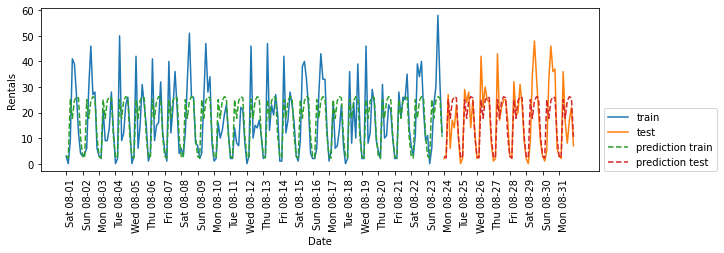

In [80]:
# ここで専門家の知識。訓練データのレンタル履歴をみると1日の中の時間帯と曜日が重要そうだ。
# POSIX時刻の特徴量を捨てて、まずは1日の中の時刻だけを入れてみる
X_hour = citibike.index.hour.to_numpy().reshape(-1, 1)
eval_on_features(X_hour, y, regressor)
# 曜日にかかわらず同じパターンを描いている

Test-set R^2: 0.84


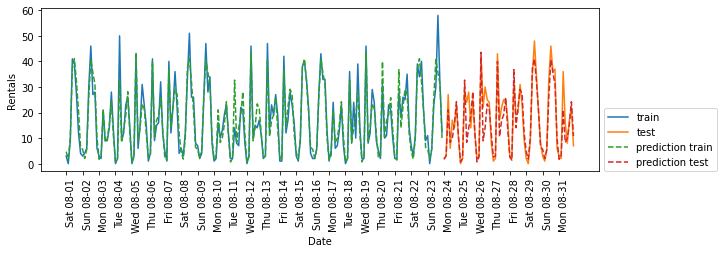

In [81]:
# 曜日情報を加えてみる
X_hour_week = np.hstack([citibike.index.dayofweek.to_numpy().reshape(-1, 1), citibike.index.hour.to_numpy().reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Test-set R^2: 0.13


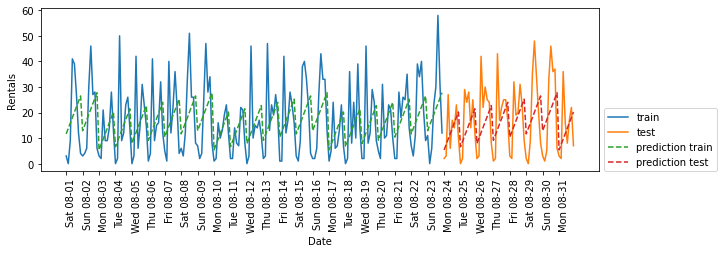

In [82]:
# 簡単なLinearRegressionで試してみる
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())
# 曜日や時刻が整数でエンコードされていて、連続値として解釈されてしまっているため、時刻に対する線形関数としか見ていない
# →時刻が遅いほどレンタル数が大きいと学習してしまっている。

In [85]:
# 整数をOneHotEncoderを用いて変換することで、カテゴリ変数として解釈させてみる
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray() # to_arrayがないとcsr_matrixの形になっている
# 曜日と時刻に対して係数を学習するため、時刻に対するパターンは全ての曜日に対して同じになる

Test-set R^2: 0.62


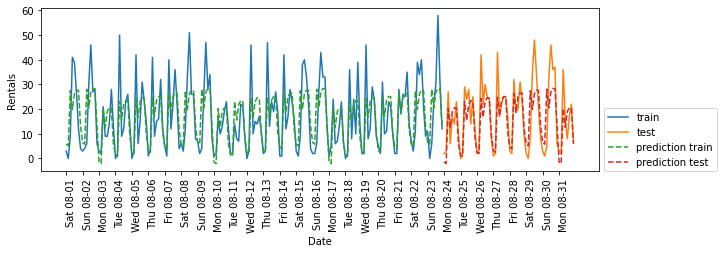

In [86]:
eval_on_features(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


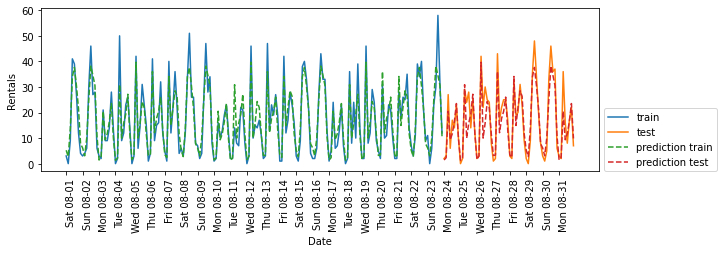

In [87]:
# 交互作用特徴量を用いれば、曜日と時刻の組み合わせに対して学習できる
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)
# この変換によってようやくランダムフォレストと同等の性能になった。

In [88]:
# このモデルで学習した係数をプロットしてみることができる。これはランダムフォレストではできない
# まず時刻と曜日の特徴量に名前をつける
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

In [89]:
# PolynomialFeaturesで抽出した交互作用特徴量に対して名前をつける
# さらに、係数が非ゼロの特徴量だけを残す
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'Feature magnitude')

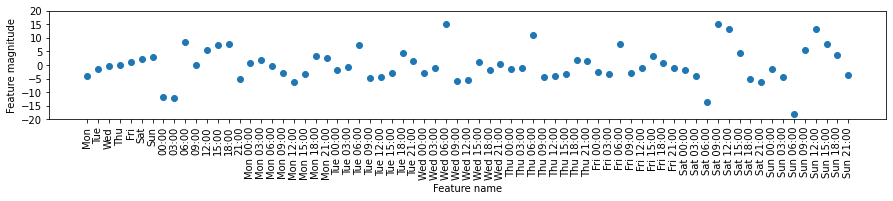

In [108]:
# 可視化
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.yticks(np.arange(-20, 21, 5)) # list(range(-20, 20, 5))と同じ
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")

In [110]:
print(np.arange(len(coef_nonzero)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]


# まとめ P.244
機械学習を応用する上では、どのような特徴量を用いるか、さらにどの特徴量とどの機械学習手法を組み合わせて用いるかが、機械学習がうまく苦かどうかを決定する最も重要な要素。